## 필기체를 구분하는 분류 ANN 구현

- 1단계: 분류 ANN 구현용 패키지 가져오기
- 2단계: 분류 ANN에 필요한 매개변수 설정
- 3단계: 분류 ANN모델 구현
- 4단계: 학습과 성능 평가용 데이터 가져오기
- 5단계: 분류 ANN 학습 및 검증
- 6단계: 분류 ANN 학습 결과 분석

In [5]:
# 1. bring keras package for ANN classification

# layers: module that can make layer

# models: role for compilng and training after connective each layer with ANN model + Evaluation of model
# -> model methods: compile(), fit(), predict(), evaluate()

from keras import layers, models

In [3]:
# 2. define variable at classification ANN

# necessary variable list: Nin (입력 게층의 노드수), Nh (은닉 계층의 노드수), number_of_class (출력값이 가질 클래스 수), Nout (출력 노드 수)



In [ ]:
# 3. Modeling (important level)

# 2 types for modeling Artifical model
# distribution model (ANN모델을 분산 방식으로 구현하는 것)
# chain model 

# 2 types for implementing Artificial model
# (1) function oriented (함수형)
# (2) object oriented (객체지향형)

In [9]:
# full code

# 분산 방식 모델링을 포함하는 함수형 구현
def ANN_models_func(Nin, Nh, Nout):
    # 입력 계층 정의 (Nin개수의 기준?)
    x = layers.Input(shape=(Nin,)) 
    
    # 은닉층 생성 (입력은 입력층에서 얻어진 데이터, 활성화 함수는 relu)
    # Nh의 개수에 대한 정의는 없음
    h = layers.Activation('relu')(layers.Dense(Nh)(x)) 
    
    # 출력층 (입력은 은닉층에서 얻어진 값, 활성화 함수는 softmax) -> 확률로 바꿔줌
    # Nout: Nout의 개수는 분류하려는 클래수와 동일함
    y = layers.Activation('softmax')(layers.Dense(Nout)(h)) 
    
    
    model = models.Model(x, y)
    model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

# 연쇄 방식 모델링을 포함하는 함수형 구현
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrices=['accuracy'])
    return model

# 분산 방식 모델링을 포함하는 객체지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',optimizer='adam', metrices=['accuracy'])
        
# 연쇄 방식 모델링을 포함하는 객체지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    
    

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras.utils import np_utils


def Data_func():
    # 데이터 전처리 단계
    # 1. 데이터 처리에 사용할 패키지 가져오기
    # 2. 데이터 가져오기
    # 3. 출력값 변수를 이진 벡터 형태로 바꾸기
    # 4. 이미지를 나타내는 인자를 1차원 벡터 형태로 바꾸기
    # 5. ANN을 위해 입력값을 정규화하기 
    
    # 1단계: import datasets
    # 2단계: 총 6만개의 필기체 숫자를 모든 공개 데이터를 받음 (Keras에서는 자주쓰는 데이터셋을 쉽게 불러오는 라이브러리를 제공)
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() 
    #print(x_train)
    # 3단계: 출력값 변수를 이진 벡터 형태로 전환
    # to_categorical: One-hot 인코딩을 해줌 (개요: 컴퓨터는 문자보다는 숫자를 더 잘처리할수있음, 받은 데이터를 이진 벡터 형태로 바꾸는게 주 목적임)
    # 즉, 해당 함수를 통해서 0~9숫자로 구성된 출력 값을 0과 1로 표현되는 벡터 10개로 바꿈
    # 해당 과정을 통해서 분류 작업 시 정수보다 이진 벡터로 출력 변수를 구성하는 것이 효율적이기 때문임
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    # 4단계: 1차원 벡터 형태로 이미지를 바꿈
    # x_train & x_test에 (x,y) 축에 대한 픽셀 정보가 들어 있는 3차원 데이터인 실제 학습 및 평가용 이미지를 2차원으로 조정함
    # x_train은 L x H x W와 같은 모양의 텐서로 저장되어 있음
    # L = 샘플의 개수, 
    L, H, W = x_train.shape
    
    print("L: ",L) # 60000개
    print("H: ",H) # 1개의 사진 높이 28
    print("W: ",W) # 1개의 사진 너비 28
    x_train = x_train.reshape(-1, W * H)
    #print("after reshape x_train: ", x_train.size) [786, 786, 786, 786, ...., 786] -> 이래서 47,040,000 
    x_test = x_test.reshape(-1, W * H)
    
    # 5단계: 정규화 과정 수행
    # 여기서 255로 나눠준 이유는 사진 한개에 있는 픽셀 데이터가 0~255 사이의 정수로 구성되어 있기 때문임
    # 상당히 clear 한 설명 블로그: https://hyjykelly.tistory.com/16
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    return (x_train, y_train), (x_test, y_test)

def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history['loss']) # 실제 학습 데이터로 구한 손실값
    plt.plot(history['val_loss']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실값
    
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history['accuracy']) # 실제 학습 데이터에 따른 정확도를 의미함
    plt.plot(history['val_accuracy']) # 검증 데이터에 따른 정확도를 의미함

    if title is not None:
        plt.title(title)
        
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'], loc=0)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
L:  60000
H:  28
W:  28
x train size 47040000
Train on 36000 samples, validate on 24000 samples
Epoch 1/15
36000/36000 [==============================] - 1s 36us/step - loss: 0.4348 - accuracy: 0.8811 - val_loss: 0.2496 - val_

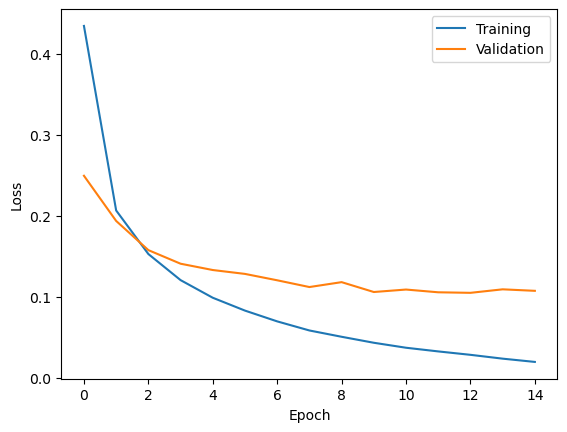

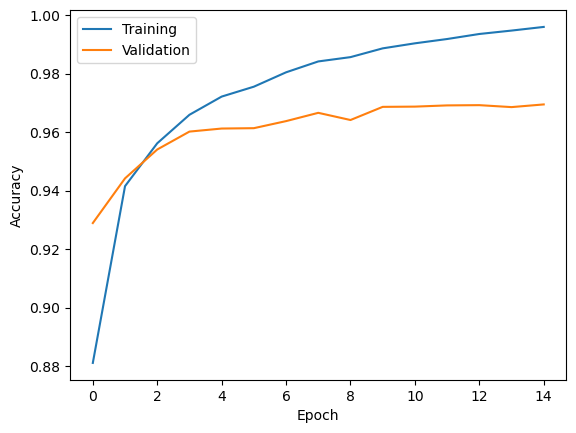

In [30]:
def main():
    Nin = 784 #입력 변수의 수와 입력 노드의 수는 같다.
    Nh = 100 # 
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (x_train, y_train), (x_test, y_test) = Data_func() 
    #print("x train size", x_train.size)
    # Training start
    history = model.fit(x_train, y_train, epochs=15, batch_size=100, validation_split=0.4)
    performance_test = model.evaluate(x_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
if __name__ == '__main__':
    main()